# Chapter 11: Testing with Out-of-Sample Data

In [1]:
import sys
import os
sys.path.append('/home/yutanagano/Projects/nnfs')
os.chdir('/home/yutanagano/Projects/nnfs')

In [2]:
import numpy as np
import nnfs
from nnfs.datasets import sine_data, spiral_data

nnfs.init()

import nnn

## Regression

In [3]:
# Create datasets
X, y = sine_data()

model = nnn.module.Module()

# CAdd layers
model.add(nnn.layer.Dense(1, 64))
model.add(nnn.activation.Relu())
model.add(nnn.layer.Dense(64, 64))
model.add(nnn.layer.Dropout(0.1))
model.add(nnn.activation.Relu())
model.add(nnn.layer.Dropout(0.1))
model.add(nnn.layer.Dense(64, 1))
model.add(nnn.activation.Linear())

# Set loss and optimiser objects
model.set(
    loss=nnn.loss.MeanSquaredError(),
    optimiser=nnn.optimiser.Adam(learning_rate=0.005, decay=1e-4),
    accuracy=nnn.accuracy.Regression()
)

model.finalise()

In [4]:
model.train(X, y, epochs=2000, print_every=100)

epoch: 100, acc: 0.005, loss: 0.098, (data_loss: 0.098, reg_loss: 0.000), lr: 0.004950985246063967
epoch: 200, acc: 0.010, loss: 0.057, (data_loss: 0.057, reg_loss: 0.000), lr: 0.0049024414158250805
epoch: 300, acc: 0.006, loss: 0.046, (data_loss: 0.046, reg_loss: 0.000), lr: 0.004854840275754928
epoch: 400, acc: 0.011, loss: 0.045, (data_loss: 0.045, reg_loss: 0.000), lr: 0.004808154630252909
epoch: 500, acc: 0.008, loss: 0.025, (data_loss: 0.025, reg_loss: 0.000), lr: 0.004762358319839985
epoch: 600, acc: 0.020, loss: 0.012, (data_loss: 0.012, reg_loss: 0.000), lr: 0.004717426172280404
epoch: 700, acc: 0.030, loss: 0.010, (data_loss: 0.010, reg_loss: 0.000), lr: 0.004673333956444527
epoch: 800, acc: 0.021, loss: 0.010, (data_loss: 0.010, reg_loss: 0.000), lr: 0.004630058338735067
epoch: 900, acc: 0.019, loss: 0.009, (data_loss: 0.009, reg_loss: 0.000), lr: 0.004587576841912102
epoch: 1000, acc: 0.016, loss: 0.008, (data_loss: 0.008, reg_loss: 0.000), lr: 0.0045458678061641965
epoch: 

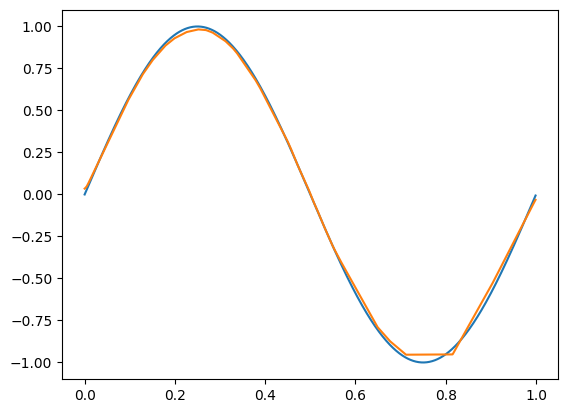

In [5]:
import matplotlib.pyplot as plt

X_test, y_test = sine_data()

output = model.forward(X_test, training=False)

plt.plot(X_test, y_test)
plt.plot(X_test, output)
plt.show()

## Logistic regression

In [6]:
# Create test and train datasets
X, y = spiral_data(samples=100, classes=2)
X_test, y_test = spiral_data(samples=100, classes=2)

y = y.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Instantiate model
model = nnn.module.Module()

model.add(nnn.layer.Dense(2, 64, l2w=5e-4, l2b=5e-4))
model.add(nnn.activation.Relu())
model.add(nnn.layer.Dense(64, 1))
model.add(nnn.activation.Sigmoid())

model.set(
    loss=nnn.loss.BinaryCrossentropy(),
    optimiser=nnn.optimiser.Adam(decay=5e-7),
    accuracy=nnn.accuracy.Categorical(binary=True)
)

model.finalise()

In [7]:
model.train(X, y, validation_data=(X_test, y_test), epochs=10000, print_every=100)

epoch: 100, acc: 0.605, loss: 0.672, (data_loss: 0.671, reg_loss: 0.001), lr: 0.0009999505024501287
epoch: 200, acc: 0.625, loss: 0.664, (data_loss: 0.662, reg_loss: 0.001), lr: 0.0009999005098992651
epoch: 300, acc: 0.630, loss: 0.657, (data_loss: 0.655, reg_loss: 0.002), lr: 0.000999850522346909
epoch: 400, acc: 0.630, loss: 0.649, (data_loss: 0.646, reg_loss: 0.003), lr: 0.0009998005397923115
epoch: 500, acc: 0.665, loss: 0.644, (data_loss: 0.641, reg_loss: 0.004), lr: 0.0009997505622347225
epoch: 600, acc: 0.670, loss: 0.638, (data_loss: 0.633, reg_loss: 0.005), lr: 0.0009997005896733929
epoch: 700, acc: 0.675, loss: 0.630, (data_loss: 0.623, reg_loss: 0.006), lr: 0.0009996506221075735
epoch: 800, acc: 0.680, loss: 0.620, (data_loss: 0.611, reg_loss: 0.008), lr: 0.000999600659536515
epoch: 900, acc: 0.690, loss: 0.609, (data_loss: 0.598, reg_loss: 0.011), lr: 0.0009995507019594694
epoch: 1000, acc: 0.695, loss: 0.599, (data_loss: 0.586, reg_loss: 0.013), lr: 0.000999500749375687
ep

## Multi-class Classification

In [8]:
# Create test and train datasets
X, y = spiral_data(samples=200, classes=3)
X_test, y_test = spiral_data(samples=100, classes=3)

# Instantiate model
model = nnn.module.Module()

model.add(nnn.layer.Dense(2, 32, l2w=5e-4, l2b=5e-4))
model.add(nnn.activation.Relu())
model.add(nnn.layer.Dropout(0.1))
model.add(nnn.layer.Dense(32, 3))
model.add(nnn.activation.Softmax())

model.set(
    loss=nnn.loss.CategoricalCrossEntropy(),
    optimiser=nnn.optimiser.Adam(learning_rate=0.05, decay=5e-5),
    accuracy=nnn.accuracy.Categorical()
)

model.finalise()

In [9]:
model.train(X, y, validation_data=(X_test, y_test), epochs=10000, print_every=100)

epoch: 100, acc: 0.555, loss: 0.946, (data_loss: 0.930, reg_loss: 0.017), lr: 0.04975371909050202
epoch: 200, acc: 0.570, loss: 0.911, (data_loss: 0.887, reg_loss: 0.024), lr: 0.049507401356502806
epoch: 300, acc: 0.608, loss: 0.886, (data_loss: 0.861, reg_loss: 0.026), lr: 0.0492635105177595
epoch: 400, acc: 0.575, loss: 0.882, (data_loss: 0.855, reg_loss: 0.027), lr: 0.04902201088288642
epoch: 500, acc: 0.587, loss: 0.898, (data_loss: 0.872, reg_loss: 0.026), lr: 0.048782867456949125
epoch: 600, acc: 0.583, loss: 0.846, (data_loss: 0.820, reg_loss: 0.025), lr: 0.04854604592455945
epoch: 700, acc: 0.635, loss: 0.835, (data_loss: 0.811, reg_loss: 0.024), lr: 0.048311512633460556
epoch: 800, acc: 0.590, loss: 0.886, (data_loss: 0.863, reg_loss: 0.023), lr: 0.04807923457858551
epoch: 900, acc: 0.607, loss: 0.842, (data_loss: 0.820, reg_loss: 0.022), lr: 0.04784917938657352
epoch: 1000, acc: 0.632, loss: 0.852, (data_loss: 0.830, reg_loss: 0.022), lr: 0.04762131530072861
epoch: 1100, acc: